# <center>Практикум по случайным процессам</center>
<center><i>Журавлев Алексей, 396 группа</i></center>
<center><small> Задача 2 </small></center>

# Часть 1

Для значений времени на отрезке $ [0; \pi] $ значения винеровского процесса могут быть вычислены по формуле.
$$ W_t = \frac{\xi_0 t}{\sqrt{\pi}} + \sqrt{\frac{2}{\pi}}\sum_{k=1}^{\infty}\frac{\sin{kt}}{k}\xi_k $$
Для продления этого процесса на всю положительную полуось, можно построить нужное количество таких независимых винеровских процессов на отрезке $[0; \pi]$ и естественным образом их склеить. Это корректная процедура для моделирования процесса с независимыми приращениями.
Таким образом, если $(W_t^{(k)}, t\in[0;pi], k\in\mathbb{N})$ - независимые конструкции винеровского процесса на $ [0; \pi] $, то 
$$ W_t = \Bigg{\{} \sum\limits_{l=1}^{k} W_{\pi}^{(l)} + W_{t-\pi{k}}^{(k+1)}, \mbox{при } t\in[{\pi}k; {\pi}(k+1)]  \Bigg{\}} $$ - винеровский процесс на $\mathbb{R}_{+}$

Определим класс моделирующий винеровский процесс. Внутри класса мы будем хранить точность вычисления $n$ - количество слагаемых в каждой сумме, и список выборок, каждая из которых размера $n$, из нормального распределения. Поддерживаем выборку для каждого отрезка вида $[\pi{k}; {\pi}(k+1)]$. Также храним список из значений процесса в точках $ {\pi}k $ для более быстрого пересчёта.

В конструкторе инициализируем все значения, никаких выборок изначально не гененерируем.
При запросе значения процесса на отрезке, генерируем выборки, если они ещё не сгенерированы в нужном количестве, и подсчитываем значение по формуле.

<font color = "FF0000">
В _calculate_on_subsegment вместо цикла можно было написать
</font>

<font color = "FF0000">
Вообще всегда старайся вместо циклов использовать средства numpy.
Будет намного быстрее работать.
</font>

In [1]:
from scipy.stats import norm
from math import sqrt, pi, sin

class WinerProcess:
    def __init__(self, n):
        self.variates = []
        self.border_values = []
        self.border_values.append(0)
        self.n = n

    def _calculate_on_subsegment(self, time, variates):
        sum = variates[0] * time / sqrt(pi)
        for k in range(1, self.n):
            sum += sqrt(2 / pi) * sin(k * time) * variates[k] / k
        return sum
    
    def _add_variates_segment(self):
        new_variates = norm.rvs(size=self.n)
        self.variates.append(new_variates)
        self.border_values.append(self.border_values[-1] + self._calculate_on_subsegment(pi, new_variates))
    
    def __getitem__(self, times):
        results = []
        for time in times:
            subsegment_number = int(time / pi)
            while subsegment_number >= len(self.variates):
                self._add_variates_segment()
            subsegment_time = time - subsegment_number * pi
            subsegment_value = self._calculate_on_subsegment(subsegment_time, self.variates[subsegment_number])
            value = self.border_values[subsegment_number] + subsegment_value
            results.append(value)
        return results

Определим функцию для построения траектории винеровского процесса с заданной точностью $n = presicion$ на отрезке $[0, scale]$. Будем брать разбиение массштабного отрезка на достаточно большое количество частей (по умолчанию 10000), чтобы видеть качественное поведение траектории.

In [2]:
%matplotlib inline

from matplotlib import pyplot
from numpy import arange

def display_trajectory(presicion, scale, number_of_points = 10000):
    process = WinerProcess(presicion)
    arguments = arange(0, scale, scale / number_of_points)
    values = process[arguments]
    pyplot.plot(arguments, values)
    pyplot.show()
    

Построим траектории при значениях $n=10, 100, 1000$ на отрезке $[0, 10]$.

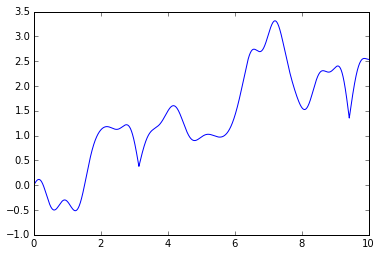

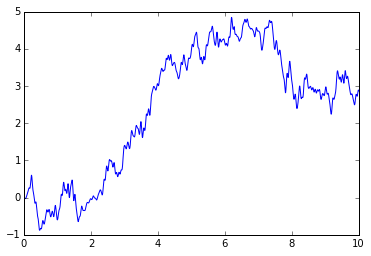

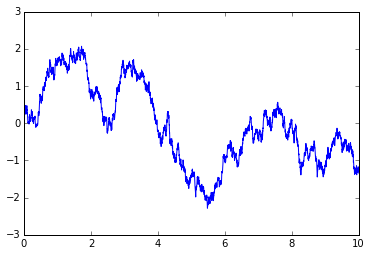

In [3]:
display_trajectory(10, 10)
display_trajectory(100, 10)
display_trajectory(1000, 10)

Заметим, что чем больше $n$, тем менее гладкой становится функция, что неудивительно, т. к. известно, что в пределе траектория должна быть почти наверное нигде не дифференцируемой.

Проверим, что вид процесса не меняется с уменьшением масштаба, если при этом подбирать достаточно большое n.

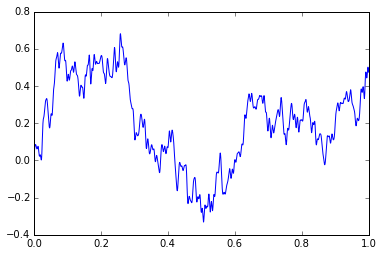

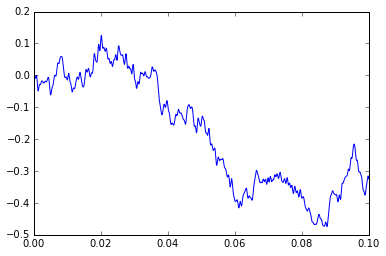

In [4]:
display_trajectory(1000, 1)
display_trajectory(10000, 0.1)

Заметим, что это свойство не выполняется, если при уменьшении мастаба не увеличивать $n$.

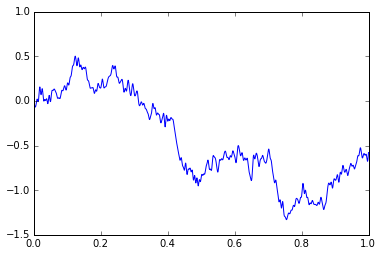

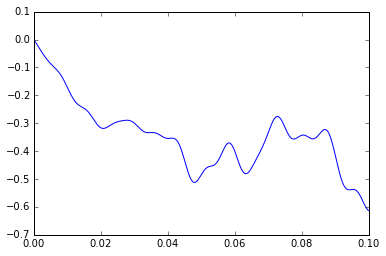

In [5]:
display_trajectory(1000, 1)
display_trajectory(1000, 0.1)

При меньшем масштабе траектория более гладкая, так что чем меньше масштаб процесса, тем большую точность нужно выбирать для правильной аппроксимации.

Отметим наконец, что при фиксированном $n$ все построенные траектории являются дифференцируемыми по $t$ во всех точках, как конечная сумма дифференцируемых функций. Что тем не менее не удивительно, т.к. мы моделируем лишь некоторое приближение винеровского процесса, которое лишь стремится при увеличении точности к реальной траектории винеровского процесса по норме $L_2$.

<font color = "FF0000">
Здесь все хорошо.
</font>

# Часть 2

Определим функцию, моделирующую процесс Миллера-Орра.  

Это будет функция, принимающая набор параметров процесса: 

start_a, start_b - начальный капитал и начальный темп роста капитала компании. 

y_min, y_med, y_max - минимальный, нормальный, и максимальный капиталы компании. 

sigma1 - разброс случайной величины $\mathcal{N}(y_{med}-y_{min}, \sigma_1^2)$ - мгновенная прибыль с продажи акций. 

b2, sigma2 - параметры случайной величины $\mathcal{N}(b_2, \sigma_2^2)$ - изменение темпа роста прибыли после продажи акций. 

T - время, на которое берётся кредит. 

b3, sigma3 - параметры случайной величины $\mathcal{N}(b_3, \sigma_3^2)$ - изменение темпа роста после покупки кредита. 

sigma4 - разброс случайной величины, отвечающей за стоимость акций на рынке при покупке. 

b5, sigma5 - параметры случайной величины $\mathcal{N}(b_5, \sigma_5^2)$ - изменение темпа роста прибыли после вложения капитала в покупку акций. 

lamb - параметр случайной величины $exp(\lambda)$ - отвечающей за время между появлениями новых технологий на рынке. 

hy_sigma - разброс $ \sigma_{hytech} $ случайной величины $\mathcal{N}(0, \sigma_{hytech}^2)$ - изменение темпа роста прибыли, связанное с появлением новой технологии на рынке. 

Также принимается параметр winer_precision - точность используемого при моделировании винеровского процесса.

Iterable объект arguments - последовательность времён, в которые запрашивается значение процесса. При этом подразумевается, что эти моменты распределены равномерно с достаточно мелким шагом. При необходимости построения графика нужно передать разбиение оси абсцисс, по которым будет строится график.

Моделирующая функция последовательно перемещается по моментам времени и подсчитывает значения процесса в них. При переходе через предельные значения капитала происходит пересчёт параметров процесса в соответствии с описанием выше. 

При достижении верхней границы, происходит покупка акций. Эти акции явно накапливаются у компании. Подразумевается, что изначально у компании нет запасов акций, а если они есть, то продавать их компания будет только в крайнем случае. При достижении нижней границы происходит продажа акций, если они имеются. Если акций нет, то компания берёт долг. Если при этом имеется неоплаченный долг, то компания продаёт свои резервные акции в надежде их позже выкупить.

В случайные моменты времени происходят технологические прорывы, изменяющие наклон прямой непосредственного роста прибыли компании.

In [6]:
from scipy.stats import expon
from scipy.stats import laplace

def recalculate_linear_shift(a, b, b_shift, point):
    return a - b_shift * point, b + b_shift

def miller_ore_process(start_a, start_b, y_min, y_med, y_max, sigma1, b2, sigma2, 
                        T, b3, sigma3, sigma4, b5, sigma5, lamb, hy_sigma, winer_precision, arguments):
    a = start_a
    b = start_b
    winer = WinerProcess(winer_precision)
    results=[]
    next_hytech = expon.rvs(scale =  1 / lamb)
    stock_balance = 0
    next_debt_purchase = 0
    debt_amount = 0
    for current_time in arguments:
        current_amount = a + b * current_time + winer[[current_time]][0]
        results.append(current_amount)
        if debt_amount > 0 and current_time >= next_debt_purchase:
            a -= debt_amount
            debt_amount = 0
            print("Time moment " + str(current_time) + " Giving back debt.")
        if current_time >= next_hytech:
            b_shift = norm.rvs(scale = hy_sigma ** 2)
            a, b = recalculate_linear_shift(a, b, b_shift, current_time)
            next_hytech = current_time + expon.rvs(scale = 1 / lamb)
            print("Time moment " + str(current_time) + " new hytech.")
        if current_amount <= y_min:
            if debt_amount > 0 or stock_balance > 0:
                stock_balance -= 1
                a += norm.rvs(loc = y_med - y_min, scale = sigma1 ** 2)
                b_shift = norm.rvs(loc = b2, scale = sigma2 ** 2)
                a, b = recalculate_linear_shift(a, b, b_shift, current_time)
                print("Time moment " + str(current_time) + " Retreiving stocks.")
            else:
                debt_amount = y_med - y_min
                next_debt_purchase = current_time + T
                a += y_med - y_min
                b_shift = norm.rvs(loc = b3, scale = sigma3 ** 2)
                a, b = recalculate_linear_shift(a, b, b_shift, current_time)
                print("Time moment " + str(current_time) + " Taking debt")
        if current_amount >= y_max:
            stock_balance += 1
            a += laplace.rvs(loc = (y_med - y_max) / 2, scale = sigma4 ** 2)
            b_shift = norm.rvs(b5, sigma5 ** 2)
            a, b = recalculate_linear_shift(a, b, b_shift, current_time)
            print("Time moment " + str(current_time) + " collecting stocks.")
    return results

Будем подбирать значения параметров для моделирования процесса. 

Для начальной определённости скажем, что будем строить график процесса на временном отрезке $[0, 100]$ с шагом разбиения $0.01$. 

Рассмотрим предельные уровни: $ y_{min}=10, y_{med}=20, y_{max}=30 $. 

Хочется, чтобы технологический прорыв просходил в среднем каждые 20 единиц времени, положим $\lambda = 0.05$.

Изменение темпа роста при технологическом прорыве сделаем не очень большим: $\sigma_{hytech} = 0.2$

Мгновенная прибыль с продажи акций в среднем будет составлять $10$ единиц, положим разброс $\sigma_1 = 1.5$. 

Будем считать, что после продажи акций, темп роста капитала меняется на $1\pm0.5$. Положим $b_2=1, \sigma_2=0.5$. 

Пусть в долг дают на 20 единиц времени. $T=20$

Хочется, чтобы покупка кредита давала возможность расти капиталу компании потенциально сильнее, чем при продаже акций, но при этом имела большую непредсказуемость. Например, рассмотрим изменение $1.5\pm1$. Положим $b_3=1.5, \sigma_3=1$.

В среднем акции при покупке стоят 5 единиц, положим разброс равным $\sigma_4=1$

После покупки акций темпы роста уменьшаются. Так как в нашей модели акции в среднем покупаются дешевле, чем продаются, то влияние на изменение темпа роста также должно быть меньше. Будем считать, что измненение составляет $-0.8\pm0.3$. Положим $b_5=-0.8, \sigma_5 = 0.3 $

Начальный капитал положим равным оптимальному: 20 единиц. 
Для начала рассмотрим отрицательный начальный прирост капитала: -0.5

Time moment 10.63 Taking debt
Time moment 17.76 collecting stocks.
Time moment 18.49 new hytech.
Time moment 21.13 collecting stocks.
Time moment 24.97 new hytech.
Time moment 30.64 Giving back debt.
Time moment 36.39 Retreiving stocks.
Time moment 46.56 collecting stocks.
Time moment 71.77 collecting stocks.


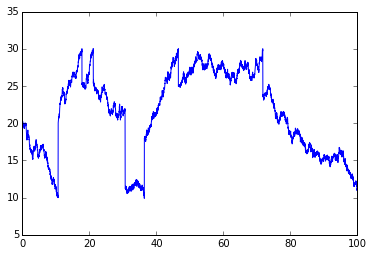

In [7]:
args = arange(0, 100, 0.01)
results = miller_ore_process(start_a=20, start_b=-0.5, y_min=10, y_max=30, y_med=20, sigma1=1.5,
                             b2=1, sigma2=0.5, T=20, b3=1.5, sigma3=1, sigma4=1, b5=-0.8, sigma5=0.3, lamb = 0.05,
                             hy_sigma = 0.2, winer_precision=1000, arguments=args)
pyplot.plot(args, results)
pyplot.show()

Можно заметить, что в такой модели, компании так или иначе приходится изначально брать кредит. При благоприятном фоне, после взятия кредита, наблюдается рост финансов и даже возможность купить акции в каком-то количестве перед тем, как вернуть долг. После этого, даже если финансы компании убывают, компания может продолжить своё существование засчёт продажи акций.

Посмотрим, что происходит, если изначально компания находится в благоприятном состоянии и её капитал растёт: start_b=0.5

Time moment 17.23 new hytech.
Time moment 21.41 collecting stocks.
Time moment 69.11 Retreiving stocks.
Time moment 84.54 collecting stocks.


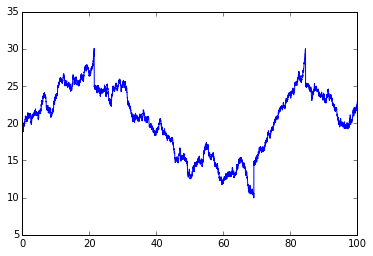

In [8]:
args = arange(0, 100, 0.01)
results = miller_ore_process(start_a=20, start_b=0.5, y_min=10, y_max=30, y_med=20, sigma1=1.5,
                             b2=1, sigma2=0.5, T=20, b3=1.5, sigma3=1, sigma4=1, b5=-0.8, sigma5=0.3, lamb = 0.05,
                             hy_sigma = 0.2, winer_precision=1000, arguments=args)
pyplot.plot(args, results)
pyplot.show()

В этом случае, капитал компании сразу растёт, она скупает акции и может после этого в случае кризиса просто продать их.

Рассмотрим, наконец случай, когда компания изначанльно находится в состоянии стагнации: start_b=0

Time moment 9.29 new hytech.
Time moment 32.17 new hytech.
Time moment 52.2 new hytech.
Time moment 56.93 new hytech.
Time moment 66.89 new hytech.
Time moment 79.45 new hytech.


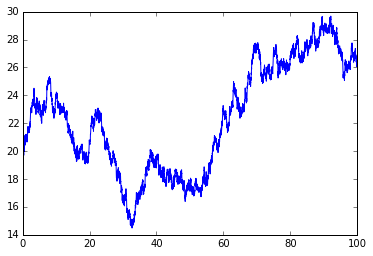

In [9]:
args = arange(0, 100, 0.01)
results = miller_ore_process(start_a=20, start_b=0, y_min=10, y_max=30, y_med=20, sigma1=1.5,
                             b2=1, sigma2=0.5, T=20, b3=1.5, sigma3=1, sigma4=1, b5=-0.8, sigma5=0.3, lamb = 0.05,
                             hy_sigma = 0.2, winer_precision=1000, arguments=args)
pyplot.plot(args, results)
pyplot.show()

В этом случае качественное поведение зависит от зашумлённости (поведения винеровского процесса вначале). Может наблюдаться любая из 2 схем, описанных выше. Какое-то время можно в принципе не достичь критических точек.

<font color = "FF0000">
Еще хорошо было бы нанести эти точки на графики для большей наглядности.

Хорошая работа. Молодец!
</font>